<img height="60px" src="/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

## 欢迎使用 Colaboratory！

Colaboratory 是免费的 Jupyter 笔记本环境，不需要进行任何设置就可以使用，并且完全在云端运行。要了解更多信息，请参阅我们的[常见问题解答](https://research.google.com/colaboratory/faq.html)。

In [2]:
import os

import cv2

import numpy as np

import matplotlib.pyplot as plt



import pandas as pd


from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

# Import tensorflow as the backend for Keras

from keras import backend as K

K.set_image_dim_ordering('tf')

from keras.utils import np_utils

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.optimizers import SGD,RMSprop,adam

from keras.callbacks import TensorBoard

# Import required libraries for cnfusion matrix

from sklearn.metrics import classification_report,confusion_matrix

import itertools
import os

Using TensorFlow backend.


In [3]:
a=os.listdir('/content/picture')
len(a)

540

In [0]:
a.remove('.ipynb_checkpoints')


In [0]:
jtemp1=np.zeros(len(a))
jtemp1=pd.DataFrame(jtemp1)
jtemp1.columns=(["address"])

for j in range(0,len(a)):
    jtemp1.iloc[j,0]=os.path.join("/content/picture",a[j])

In [0]:
imm=cv2.imread(jtemp1['address'][0])

In [48]:
jtemp1['address'][0]

'/content/picture/fold226.jpg'

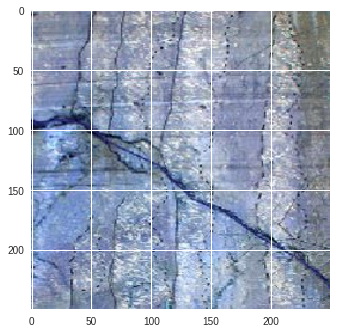

In [7]:
#print(imm)
plt.imshow(imm/255)

In [0]:
data=jtemp1
data["type"]=None

for id4 in range(0,len(a)):
    if a[id4][0:2]=="an":
        data["type"][id4]=2
    elif a[id4][0:2]=="fo":
        data["type"][id4]=0
    elif a[id4][0:2]=="fa":
        data["type"][id4]=1

In [9]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
cat_enc = LabelEncoder()
cat_enc.fit(data['type'])

LabelEncoder()

In [0]:
data['type_vec'] = data['type'].map(lambda x: to_categorical(x, len(cat_enc.classes_)))


In [0]:
import pandas as pd
from glob import glob
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.preprocessing import image

import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from itertools import chain
import numpy as np # linear algebra
from skimage.io import imread
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
IMG_SIZE = (250, 250) # slightly smaller than vgg16 normally expects
core_idg = ImageDataGenerator(samplewise_center=False, 
                              samplewise_std_normalization=False, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range = 0.15, 
                              width_shift_range = 0.15, 
                              rotation_range = 5, 
                              shear_range = 0.01,
                              fill_mode = 'nearest',
                              zoom_range=0.25,
                             preprocessing_function = preprocess_input)
def flow_from_dataframe(img_data_gen, in_df, path_col, y_col, **dflow_args):
    base_dir = os.path.dirname(in_df[path_col].values[0])
    print('## Ignore next message from keras, values are replaced anyways')
    df_gen = img_data_gen.flow_from_directory(base_dir, 
                                     class_mode = 'sparse',
                                    **dflow_args)
    df_gen.filenames = in_df[path_col].values
    df_gen.classes = np.stack(in_df[y_col].values)
    df_gen.samples = in_df.shape[0]
    df_gen.n = in_df.shape[0]
    df_gen._set_index_array()
    df_gen.directory = '' # since we have the full path
    print('Reinserting dataframe: {} images'.format(in_df.shape[0]))
    return df_gen

In [60]:
train_df, valid_df = train_test_split(data, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = data['type'])
valid_gen = flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'address',
                            y_col = 'type', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32)



## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 1 classes.
Reinserting dataframe: 135 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 1 classes.
Reinserting dataframe: 404 images


In [72]:
test_X, test_Y = next(flow_from_dataframe(core_idg, valid_df, 
                             path_col = 'address',
                            y_col = 'type_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 16))

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 1 classes.
Reinserting dataframe: 135 images


In [16]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'address',
                            y_col = 'type_vec', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 1 classes.
Reinserting dataframe: 404 images


In [65]:
train_df.groupby('type').count()

,address,type_vec
type,,
0,152,152
1,154,154
2,98,98


In [0]:
train_df = train_df.groupby(['type']).apply(lambda x: x.sample(154, replace = True))

In [67]:
train_gen = flow_from_dataframe(core_idg, train_df, 
                             path_col = 'address',
                            y_col = 'type', 
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32)

## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 1 classes.
Reinserting dataframe: 462 images


In [83]:
plt.imshow(t_x[30])

ValueError: ignored

In [0]:
t_x, t_y = next(train_gen)
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16 as PTModel, preprocess_input
base_pretrained_model = PTModel(input_shape =  t_x.shape[1:],        include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False

In [0]:
from keras.applications.vgg16 import VGG16
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Input, Conv2D, multiply, LocallyConnected2D, Lambda
from keras.models import Model
in_lay = Input(t_x.shape[1:])
base_pretrained_model = VGG16(input_shape =  t_x.shape[1:], 
                              include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
pt_depth = base_pretrained_model.get_output_shape_at(0)[-1]
pt_features = base_pretrained_model(in_lay)
from keras.layers import BatchNormalization
bn_features = BatchNormalization()(pt_features)

# here we do an attention mechanism to turn pixels in the GAP on an off

attn_layer = Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu')(bn_features)
attn_layer = Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu')(attn_layer)
attn_layer = Conv2D(1, 
                    kernel_size = (1,1), 
                    padding = 'valid', 
                    activation = 'sigmoid')(attn_layer)
# fan it out to all of the channels
up_c2_w = np.ones((1, 1, 1, pt_depth))
up_c2 = Conv2D(pt_depth, kernel_size = (1,1), padding = 'same', 
               activation = 'linear', use_bias = False, weights = [up_c2_w])
up_c2.trainable = False
attn_layer = up_c2(attn_layer)

mask_features = multiply([attn_layer, bn_features])
gap_features = GlobalAveragePooling2D()(mask_features)
gap_mask = GlobalAveragePooling2D()(attn_layer)
# to account for missing values from the attention model
gap = Lambda(lambda x: x[0]/x[1], name = 'RescaleGAP')([gap_features, gap_mask])
gap_dr = Dropout(0.5)(gap)
dr_steps = Dropout(0.5)(Dense(128, activation = 'relu')(gap_dr))
out_layer = Dense(len(cat_enc.classes_), activation = 'softmax')(dr_steps)
tb_model = Model(inputs = [in_lay], outputs = [out_layer])

tb_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                           metrics = ['categorical_accuracy'])

In [70]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('seedlings')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)


reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=10, verbose=1, mode='auto', epsilon=0.0001, cooldown=5, min_lr=0.0001)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [71]:
train_gen.batch_size = 16
tb_model.fit_generator(train_gen,                              validation_data = (valid_gen),                                  epochs = 30,                                validation_steps=20,        steps_per_epoch=10,
                                  )

Epoch 1/30


ValueError: ignored

In [0]:
Y_pred = tb_model.predict(test_X)

In [0]:
y_pred = np.argmax(Y_pred,axis=1)

In [0]:
y_pred=pd.DataFrame(y_pred)

In [50]:
confusion_matrix(test_Y1, y_pred)

array([[3, 2, 2],
       [8, 3, 2],
       [4, 6, 2]])

In [0]:
test_Y1 = np.argmax(test_Y,axis=1)

In [37]:
i=5
image = test_X[i,:].reshape((250,250,3))
plt.axis('off')
#plt.title('%d probability %f ' % (i,Y_pred[i][0]))
plt.imshow(image)
plt.show()#37

ValueError: ignored